# Задание 3
 
1) Задать геометрически границы среды;
 
2) В ней равномерно распределить частицы, для каждой задать радиус;
 
3) Задать направление распространения фотона.

## Используемые формулы
Коэффициент поглощения:
$$\mu _{a} = \frac{1}{l_{a}}$$
$$[\mu_{a}] = [м^{-1}]$$
 
Коэффициент рассеяния:
$$\mu _{s} = \frac{1}{l_{a}}$$
$$[\mu_{s}] = [м^{-1}]$$
 
Коэффициент изотропии:
$$\mu_{s}^{'} = (1 - g)\mu_{s}$$
 
Транспортная длина свободного пробега:
$$l_{tr} = (\mu_{s}^{'} + \mu_{a})^{-1}$$
 
Фазовая функция Хени-Гринстейна:
$$p(\theta) = \frac{1}{4\pi} \frac{1 - g^{2}}{(1 + g^{2} - 2gcos\theta)^{3/2}}$$

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

### Параметры среды

In [105]:
# коэффициент поглощения
m_a = 0.001

# коэффициент рассеяния
m_s = 0.001

# коэффициент изотропии
g = 0

# транспортная длина свободного пробега
trans_length = (m_a + (1 - g) * m_s) ** (-1)

In [106]:
def draw_line(x0, y0, angle):
    """
    Функция, возвращающая следующую координату относительно угла
    
    :param x0: координата x
    :param y0: координата y
    :param angle: угол
    """
    
    x1 = x0 + length * np.sin(angle)
    y1 = y0 + length * np.cos(angle)
    
    return (x1, y1)

In [107]:
def is_valid_point(point, min, max):
    """
    Проверяет, принадлежит ли точка отрезку [min, max]
    
    :param point: точка, которую проверяют
    :param min: левая граница отрезка
    :param max: правая граница отрезка
    """
    
    return point >= min and point <= max

In [108]:
def p(theta):
    """
    Фазовая функция Хени-Гринстейна
    
    :param theta: угол
    :return: значение функции относительно угла theta
    """
    
    return 1 / (4 * math.pi) * (1 - g ** 2) / (1 + g ** 2 - 2 * g * math.cos(theta)) ** (3 / 2)

In [109]:
def get_new_angle():
    """
    Функция генерирует новый угол
    
    :return: новый угол в радианах
    """
    
    while True:
        x = np.random.randint(1, 360)
        y = np.random.rand() / 2
    
        if y < p(math.radians(x)):
            return math.radians(x)

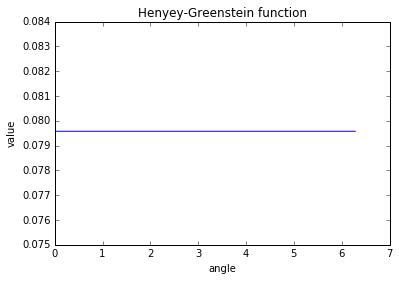

In [110]:
angles = np.arange(0, 2 * math.pi, 0.0001)
y_hen = np.array([])

for i in range(len(angles)):
    y_hen = np.append(y_hen, p(angles[i]))
    
plt.title("Henyey-Greenstein function")
plt.xlabel("angle")
plt.ylabel("value")
plt.plot(angles, y_hen)

In [111]:
# ширина поля
WIDTH = 400

# высота поля
HEIGHT = 400

# радиус точки
PARTICLE_RADIUS = 5

# количество точек
PARTICLE_COUNT = 200

# количество фотонов
PHOTONS_COUNT = 50

x = np.array([])
y = np.array([])

In [112]:
for i in range(PARTICLE_COUNT):
    xrand = np.random.randint(1, HEIGHT + 1)
    yrand = np.random.randint(1, WIDTH + 1)
    x = np.append(x, xrand)
    y = np.append(y, yrand)

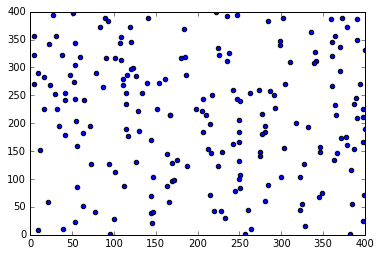

In [113]:
plt.xlim((0, WIDTH))
plt.ylim((0, HEIGHT))
plt.scatter(x, y)

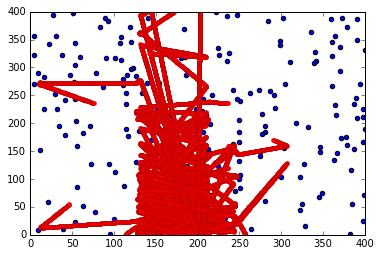

In [114]:
plt.xlim((0, WIDTH))
plt.ylim((0, HEIGHT))
plt.scatter(x, y)

for photon in range(PHOTONS_COUNT):
    
    # генерация угла из интервала (-0.5, 0.5)
    angle = (np.random.random() - 0.5) * math.pi
    # длина шага в один пиксель
    length = 1
    # начальные координаты это середина внешней границы
    x0_line = width // 2
    y0_line = 0
    # длина пути текущего фотона
    photon_length = 0

    while (True):
        (x1, y1) = draw_line(x0_line, y0_line, angle)
        (x0_line, y0_line) = (x1, y1)

        if not is_valid_point(x1, 0, WIDTH) or not is_valid_point(y1, 0, HEIGHT):
            break

        for i in range(PARTICLE_COUNT):
            if (x1 - x[i]) ** 2 + (x1 - y[i]) ** 2 <= PARTICLE_RADIUS ** 2:
                angle = get_new_angle()
    
        photon_length += length

        plt.scatter(x1, y1, c="r", linewidths=0.1)
        
        if photon_length >= trans_length:
            break
